In [1]:
import sys
sys.path.append('/home/linxuangao')

import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import torch
import umap
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import scipy


import warnings
warnings.filterwarnings("ignore")

/home/linxuangao/.conda/envs/glx/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = '/home/linxuangao/data_gpnsf/Dataset1_Mouse_Spleen1'

In [8]:
adata = sc.read_h5ad(f'{data_dir}/adata_RNA.h5ad')

# 加载注释文件
anno_df = pd.read_excel(f'{data_dir}/spleen_anno.xlsx', index_col=0)  # 第一列作为索引
anno_df.head()  # 查看数据

,Clustering
Spatial Barcode,
AAACACCAATAACTGC-1,Macrophage-enriched
AAACAGAGCGACTCCT-1,Macrophage-enriched
AAACAGCTTTCAGAAG-1,Macrophage-enriched
AAACAGGGTCTATATT-1,B cell-enriched
AAACCGGGTAGGTACC-1,Macrophage-enriched


In [9]:
print("adata.obs索引示例:", adata.obs.index[:5])
print("注释文件索引示例:", anno_df.index[:5])

# 检查是否有相同的索引
common_cells = adata.obs.index.intersection(anno_df.index)
print(f"共有 {len(common_cells)} 个共同的细胞")

adata.obs索引示例: Index(['AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1', 'AAACAGCTTTCAGAAG-1',
       'AAACAGGGTCTATATT-1', 'AAACCGGGTAGGTACC-1'],
      dtype='object')
注释文件索引示例: Index(['AAACACCAATAACTGC-1', 'AAACAGAGCGACTCCT-1', 'AAACAGCTTTCAGAAG-1',
       'AAACAGGGTCTATATT-1', 'AAACCGGGTAGGTACC-1'],
      dtype='object', name='Spatial Barcode')
共有 2568 个共同的细胞


In [10]:
# 方法1：直接添加（如果索引完全匹配）
if set(adata.obs.index).issuperset(set(anno_df.index)):
    # 将注释信息添加到adata.obs
    adata.obs['Clustering'] = anno_df['Clustering']
else:
    # 方法2：使用reindex确保匹配
    adata.obs['Clustering'] = anno_df['Clustering'].reindex(adata.obs.index)
    
# 查看添加的结果
print(adata.obs['Clustering'].value_counts())
print(adata.obs.head())

Clustering
Macrophage-enriched    1330
B cell-enriched         908
T cell-enriched         330
Name: count, dtype: int64
                             Clustering
AAACACCAATAACTGC-1  Macrophage-enriched
AAACAGAGCGACTCCT-1  Macrophage-enriched
AAACAGCTTTCAGAAG-1  Macrophage-enriched
AAACAGGGTCTATATT-1      B cell-enriched
AAACCGGGTAGGTACC-1  Macrophage-enriched


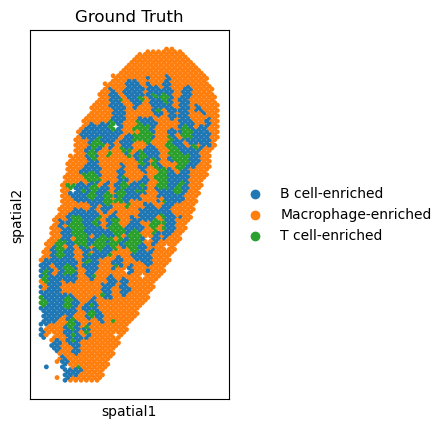

In [12]:
sc.pl.spatial(adata, color='Clustering', spot_size=1.8, title='Ground Truth')